In [1]:
import warnings
warnings.filterwarnings(action='ignore') 

# 모델 평가
모델의 성능을 평가한다. 평가결과에 따라 프로세스를 다시 반복한다.
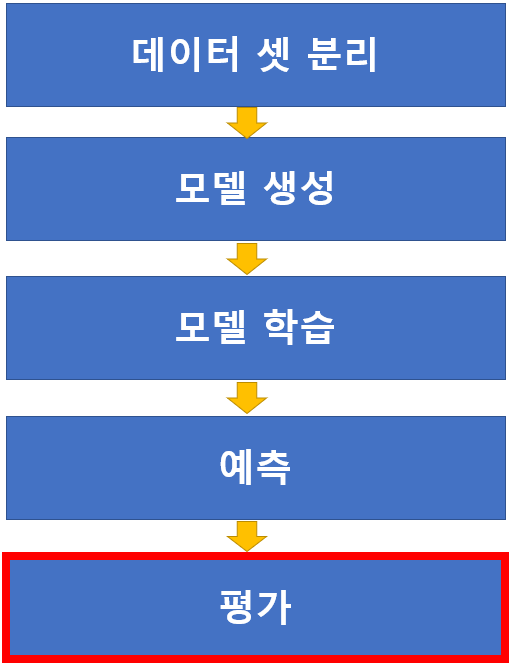

## 분류와 회귀의 평가방법

### 분류 평가 지표
1. 정확도 (Accuracy)
1. 정밀도 (Precision)
1. 재현률 (Recall)
1. F1점수 (F1 Score)
1. PR Curve, AP
1. ROC, AUC

### 회귀 평가방법
1. MSE (Mean Squared Error)
1. RMSE (Root Mean Squared Error)
1. $R^2$ (결정계수)

### sckit-learn 평가함수 모듈
- sklearn.metrics 모듈을 통해 제공

# 분류(Classification) 평가 지표

##  양성과 음성
- 양성(Positive): 모델이 찾으려는 주 대상
- 음성(Negative): 모델이 찾으려는 주 대상이 아닌 것
- 예
    - 환자 분류 
        - 양성 - 환자, 음성 - 정상인
    - 스팸메일 분류 
        - 양성 - 스팸메일, 음성 - 정상메일
    - 금융사기 모델
        - 양성 - 사기거래, 음성 - 정상거래
        

## 정확도 (Accuracy)
- 대표적인 분류의 평가 지표


$$
\large{
정확도 (Accuracy) = \cfrac{맞게 예측한 건수} {전체 예측 건수}
}
$$

- 전체 예측 한 것중 맞게 예측한 비율로 평가한다.
- `accuracy_score(정답,  모델예측값)`

### Accuracy 평가지표의 문제
- 양성(Positive)에 대한 지표만 확인 할수 없다. 
- 불균형 데이터의 경우 정확한 평가지표가 될 수 없다.
    - 예: 양성과 음성의 비율이 1:9 인 경우 모두 음성이라고 하면 정확도는 90%가 된다.

## MNIST Data set
- 손글씨 숫자 데이터 셋
    - 미국 국립표준연구소(NIST) 에서 수집한 손글씨 숫자(0 ~ 9) 데이터셋을 수정한 이미지 데이터셋.
- 사이킷런 제공 image size: 8 X 8 
    - 원본 데이터는 28 X 28 크기로 train 60,000장, test 10,000 장을 제공한다.
- https://ko.wikipedia.org/wiki/MNIST_%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B2%A0%EC%9D%B4%EC%8A%A4

### mnist 데이터 셋 로드 및 확인

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_digits

In [2]:
digits = load_digits()
digits.keys()

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])

In [3]:
digits.feature_names

['pixel_0_0',
 'pixel_0_1',
 'pixel_0_2',
 'pixel_0_3',
 'pixel_0_4',
 'pixel_0_5',
 'pixel_0_6',
 'pixel_0_7',
 'pixel_1_0',
 'pixel_1_1',
 'pixel_1_2',
 'pixel_1_3',
 'pixel_1_4',
 'pixel_1_5',
 'pixel_1_6',
 'pixel_1_7',
 'pixel_2_0',
 'pixel_2_1',
 'pixel_2_2',
 'pixel_2_3',
 'pixel_2_4',
 'pixel_2_5',
 'pixel_2_6',
 'pixel_2_7',
 'pixel_3_0',
 'pixel_3_1',
 'pixel_3_2',
 'pixel_3_3',
 'pixel_3_4',
 'pixel_3_5',
 'pixel_3_6',
 'pixel_3_7',
 'pixel_4_0',
 'pixel_4_1',
 'pixel_4_2',
 'pixel_4_3',
 'pixel_4_4',
 'pixel_4_5',
 'pixel_4_6',
 'pixel_4_7',
 'pixel_5_0',
 'pixel_5_1',
 'pixel_5_2',
 'pixel_5_3',
 'pixel_5_4',
 'pixel_5_5',
 'pixel_5_6',
 'pixel_5_7',
 'pixel_6_0',
 'pixel_6_1',
 'pixel_6_2',
 'pixel_6_3',
 'pixel_6_4',
 'pixel_6_5',
 'pixel_6_6',
 'pixel_6_7',
 'pixel_7_0',
 'pixel_7_1',
 'pixel_7_2',
 'pixel_7_3',
 'pixel_7_4',
 'pixel_7_5',
 'pixel_7_6',
 'pixel_7_7']

In [4]:
X = digits.data
y = digits.target
X.shape, y.shape

((1797, 64), (1797,))

##### label의 클래스별 빈도수 확인

In [5]:
np.unique(y, return_counts=True) # (고유값배열, 개수)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([178, 182, 177, 183, 181, 182, 181, 179, 174, 180], dtype=int64))

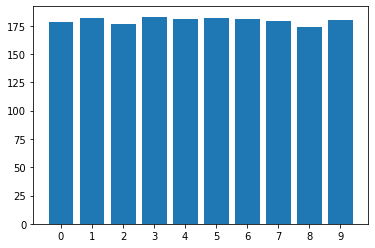

In [6]:
plt.bar(np.unique(y, return_counts=True)[0],np.unique(y, return_counts=True)[1])
plt.xticks(range(10))
plt.show()

##### image 확인

In [8]:
X.shape
X[0].reshape(8,8)
# y.shape
# y[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

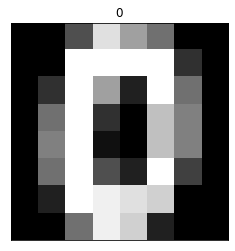

In [11]:
img_idx = 160 #보려는 그림의 index
img = X[img_idx].reshape(8,8) # data: 1차원 => 2차원으로 변경
plt.imshow(img, cmap='gray')  # 출력

plt.title(y[img_idx]) #정답을 title
plt.xticks([])
plt.yticks([])
plt.show()

In [ ]:
img

### 불균형 데이터셋으로 만들기
- y를 9와 나머지로 변경한다.
- Positive(양성 - 1): 9
- Negative(음성 - 0): 0 ~ 8

In [12]:
# np.where(y==9) #조건이 True인 index가 반환
np.where(y==9, 1, 0)  # 조건이 True인 원소를 1변환, False는 0으로 변환

array([0, 0, 0, ..., 0, 1, 0])

In [13]:
y = np.where(y==9, 1, 0)

In [14]:
y_pct = np.unique(y, return_counts=True)
y_pct

(array([0, 1]), array([1617,  180], dtype=int64))

In [15]:
# 0과 1의 비율
y_pct[1]/y.size #배열.size : 원소개수 

array([0.89983306, 0.10016694])

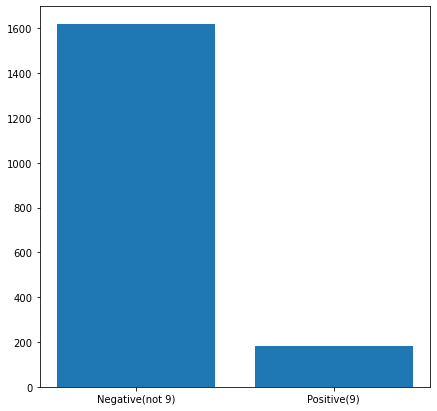

In [23]:
plt.figure(figsize=(7,7))
plt.bar(y_pct[0], y_pct[1])
plt.xticks([0,1], labels=['Negative(not 9)','Positive(9)']) 
plt.show()

### 데이터셋 분할
- train/test 로 분할

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                    random_state=0)


print(np.unique(y_train, return_counts=True)[1]/y_train.size)
print(np.unique(y_test, return_counts=True)[1]/y_test.size)

[0.89977728 0.10022272]
[0.9 0.1]


### 모델 생성 및 학습

#### Dummy Model 정의
- Target Label중 무조건 최빈값으로 예측하는 모델을 정의한다.

In [17]:
import pandas as pd
import numpy as np

from sklearn.dummy import DummyClassifier
from sklearn.metrics import accuracy_score

In [20]:
# 무조건 y중 빈도수가 제일 높은 class로 예측
dummy_model = DummyClassifier(strategy='most_frequent')

dummy_model.fit(X_train, y_train)

pred_train_dummy = dummy_model.predict(X_train)
pred_test_dummy = dummy_model.predict(X_test)

train_acc = accuracy_score(y_train, pred_train_dummy)
test_acc = accuracy_score(y_test, pred_test_dummy)
print(f"훈련데이터 정확도 {train_acc}, 테스트데이터 정확도: {test_acc}") 

훈련데이터 정확도 0.8997772828507795, 테스트데이터 정확도: 0.9


아무 학습도 하지 않았고 단순히 다수 Label을 정답으로 예측 했는데 90% 정확도(accuracy)라는 괜찮은 성능이 나옴.  
그런데 이게 좋은 모델인가?    
비록 정확도는 90%(0.9) 이지만 10%(0.1)의 **9**는 아예 분류하지 못한다. 우리가 찾으려는 대상(positive)이 9일 경우 하나도 분류해 내지 못하는 모델이 된다.     
그래서 **불균형 레이블 데이터세트**의 평가지표로 정확도만 보면 안된다. 특히 Positive에 대한 예측이 중요한 경우에는 accuracy는 알맞은 평가 지표가 아니다.

## 혼동 행렬(Confusion Marix)
- 실제 값과 예측 한 것을 표로 만든 평가표
    - 분류의 예측 결과가 몇개나 맞고 틀렸는지를 확인할 때 사용한다.
- 함수: confusion_matrix(정답, 모델예측값)
- 결과의 0번축: 실제 class, 1번 축: 예측 class

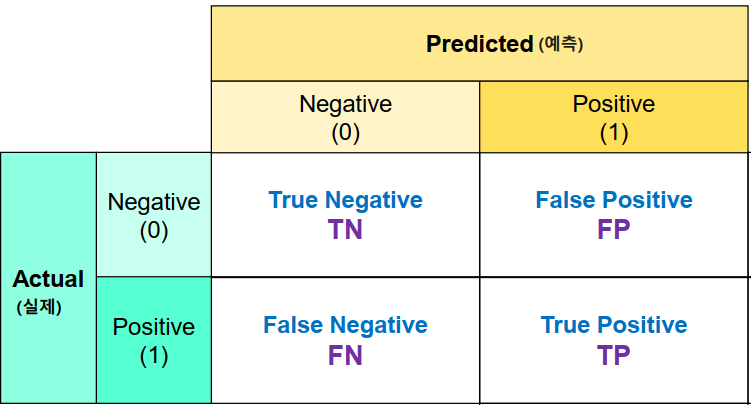

- **TP(True Positive)** 
    - 양성으로 예측했는데 맞은 개수
- **TN(True Negative)** 
    - 음성으로 예측했는데 맞은 개수
- **FP(False Positive)** 
    - 양성으로 예측했는데 틀린 개수 
    - 음성을 양성으로 예측
- **FN(False Negative)** 
    - 음성으로 예측했는데 틀린 개수 
    - 양성을 음성으로 예측

- 예)
```python
[[20, 6],
 [4,  40]]
```

## 이진 분류 평가지표

### 양성(Positive) 예측력 측정 평가지표
- **Accuracy (정확도)** 
    - 전체 데이터 중에 맞게 예측한 것의 비율
- **Recall/Sensitivity(재현율/민감도)** 
    - 실제 Positive(양성)인 것 중에 Positive(양성)로 예측 한 것의 비율
    - **TPR**(True Positive Rate) 이라고도 한다.
    - ex) 스팸 메일 중 스팸메일로 예측한 비율. 금융사기 데이터 중 사기로 예측한 비율
- **Precision(정밀도)**
    - Positive(양성)으로 예측 한 것 중 실제 Positive(양성)인 비율
    - **PPV**(Positive Predictive Value) 라고도 한다.
    - ex) 스팸메일로 예측한 것 중 스팸메일의 비율. 금융 사기로 예측한 것 중 금융사기인 것의 비율

- **F1 점수**
    - 정밀도와 재현율의 조화평균 점수
    - recall과 precision이 비슷할 수록 높은 값을 가지게 된다. F1 score가 높다는 것은 recall과 precision이 한쪽으로 치우쳐저 있이 않고 둘다 좋다고 판단할 수 있는 근거가 된다.

### 음성(Negative) 예측력 측정 평가지표
- **Specificity(특이도)**
    - 실제 Negative(음성)인 것들 중 Negative(음성)으로 맞게 예측 한 것의 비율
    - **TNR**(True Negative Rate) 라고도 한다.
- **Fall out(위양성률)**
    - 실제 Negative(음성)인 것들 중 Positive(양성)으로 잘못 예측한 것의 비율. `1 - 특이도`
    - **FPR** (False Positive Rate) 라고도 한다.
    - $Fall Out(FPF) = \cfrac{FP}{TN+FP}$

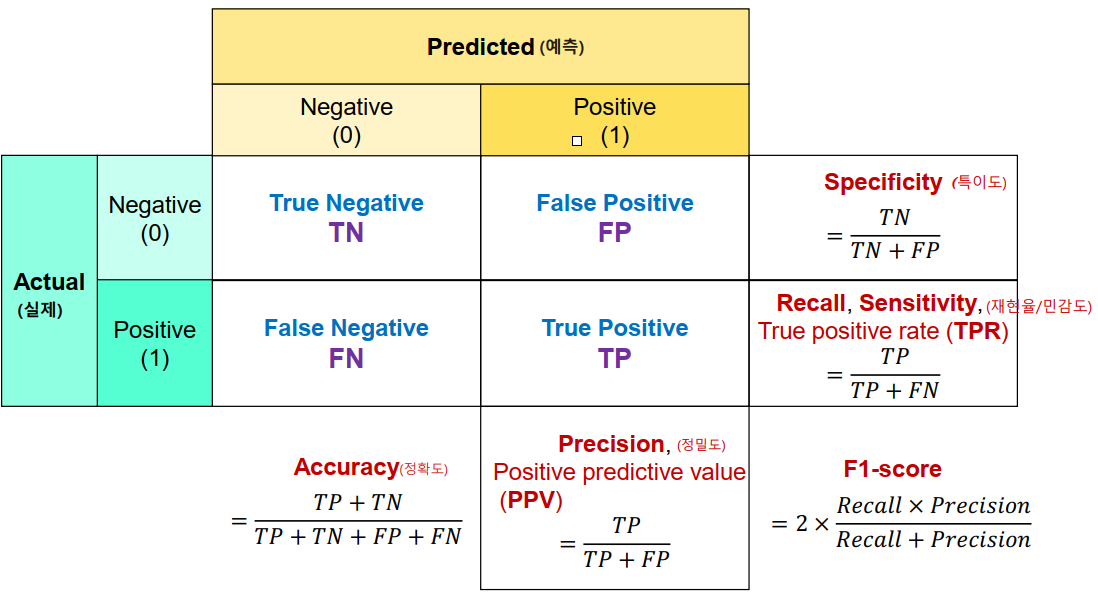

## 각 평가 지표 계산 함수
- sklearn.metrics 모듈
- **confusion_matrix(y 실제값, y 예측값)/plot_confusion_matrix()**
    - 혼돈 행렬 반환
- **recall_score(y 실제값, y 예측값)**
  - Recall(재현율) 점수 반환 (Positive 중 Positive로 예측한 비율 (TPR))
- **precision_score(y 실제값, y 예측값)**
  - Precision(정밀도) 점수 반환 (Positive로 예측한 것 중 Positive인 것의 비율 (PPV))
- **f1_score(y 실제값, y 예측값)**
    - F1 점수 반환 (recall과 precision의 조화 평균값)
- **classification_report(y 실제값, y 예측값)**
    - 클래스 별로 recall, precision, f1 점수와 accuracy를 종합해서 보여준다.

###   Dummy 모델 혼동행렬

In [21]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix, accuracy_score, recall_score, precision_score, f1_score

In [22]:
print('Train confusion matrix')
print(confusion_matrix(y_train, pred_train_dummy))
print("-"*50)
print('Test confusion matrix')
print(confusion_matrix(y_test, pred_test_dummy))

Train confusion matrix
[[1212    0]
 [ 135    0]]
--------------------------------------------------
Test confusion matrix
[[405   0]
 [ 45   0]]


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


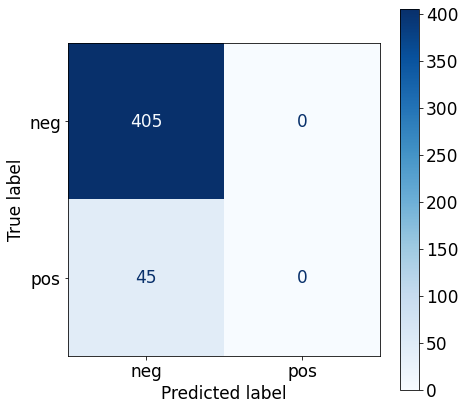

In [23]:
import matplotlib as mpl
mpl.rcParams['font.size']=17
_, ax = plt.subplots(1,1,figsize=(7,7))

# scikit-learn 1.0에서 deprecated
plot_confusion_matrix(dummy_model, # 모델
                      X_test,      # X
                      y_test,      # y
                      display_labels=['neg','pos'],
                      cmap=plt.cm.Blues,
                      values_format='d', #숫자포멧. d: 정수
                      ax=ax
                     )

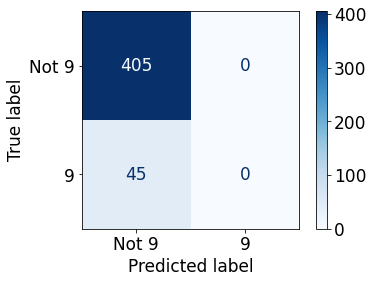

In [24]:
from sklearn.metrics import ConfusionMatrixDisplay

cm = confusion_matrix(y_test, pred_test_dummy)
disp = ConfusionMatrixDisplay(cm, #confusion matrix
                              display_labels=['Not 9', '9']) # [음성레이블, 양성레이블]
disp.plot(cmap='Blues') #출력
plt.show()

### dummy 모델 Accuracy, Recall, Precision, F1-Score

In [25]:
print("Accuracy")
accuracy_score(y_train,pred_train_dummy), accuracy_score(y_test, pred_test_dummy)

Accuracy


(0.8997772828507795, 0.9)

In [26]:
print("Recall") 
recall_score(y_train, pred_train_dummy), recall_score(y_test, pred_test_dummy)

Recall


(0.0, 0.0)

In [27]:
print('Precision')
precision_score(y_train, pred_train_dummy), precision_score(y_test, pred_test_dummy)

Precision


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


(0.0, 0.0)

In [28]:
print('f1 score')
f1_score(y_train, pred_train_dummy), f1_score(y_test, pred_test_dummy)

f1 score


(0.0, 0.0)

### TODO 머신 모델을 이용해 학습
- DecisionTreeClassifier 사용(max_depth=3)
- 모델생성
- 학습(train)
- 평가(train/test)
    - accuracy, recall, precision, f1 score, confusion_matrix 확인

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score, recall_score, precision_score, \
                            f1_score, confusion_matrix, ConfusionMatrixDisplay


In [35]:
# 모델 생성, 학습
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(n_estimators=100, max_depth=3, random_state=0)

In [40]:
tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=0)

In [41]:
# 추론
pred_train_tree = tree.predict(X_train)
pred_test_tree = tree.predict(X_test)

pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)

In [45]:
# confusion matrix
print('Tree')
print(confusion_matrix(y_train, pred_train_tree))
print('-'*30)
print(confusion_matrix(y_test, pred_test_tree))

Tree
[[1167   45]
 [  27  108]]
------------------------------
[[394  11]
 [ 11  34]]


In [55]:
# RandomForest
def display_cm(y, pred, title):
    """
    Confusion Matrix 시각화 함수
    [Paramter]
        y:ndarray - 정답(Ground Truth)
        pred:ndarray - 모델이 예측한 값
        title:str - 그래프의 제목
    [Return]
    [Exception]
    """
    plt.figure(figsize=(7,6))
    ax = plt.gca()

    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Not 9', '9'])  
    disp.plot(cmap='Blues', ax=ax)
    plt.title(title)
    plt.show()

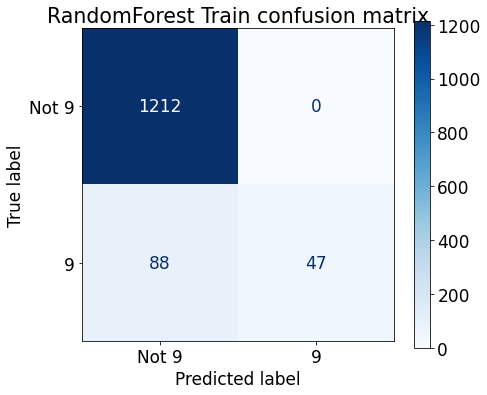

In [56]:
display_cm(y_train, pred_train_rf, 'RandomForest Train confusion matrix')

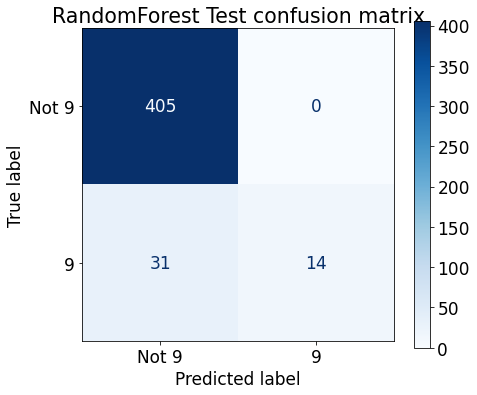

In [57]:
display_cm(y_test, pred_test_rf, 'RandomForest Test confusion matrix')

In [61]:
# 평가지표 출력 함수
def print_metrics_classifier(y, pred, title):
    """
    accuracy, recall, precision, f1점수를 출력하는 함수
    [Parameter]
        y:ndarray - 정답(Ground Truth)
        pred:ndarray - 모델이 예측한 값
        title:str - 제목
    [Return]
    [Exception]
    """
    print(title)
    print('정확도(Accuracy): ', accuracy_score(y, pred))
    print('재현률(Recall):', recall_score(y, pred))
    print('정밀도(Precision):', precision_score(y, pred))
    print("F1점수:", f1_score(y, pred))

In [62]:
print_metrics_classifier(y_train, pred_train_tree, "Tree-Train")

Tree-Train
정확도(Accuracy):  0.9465478841870824
재현률(Recall): 0.8
정밀도(Precision): 0.7058823529411765
F1점수: 0.7500000000000001


In [63]:
print_metrics_classifier(y_test, pred_test_tree, "Tree-Test")

Tree-Test
정확도(Accuracy):  0.9511111111111111
재현률(Recall): 0.7555555555555555
정밀도(Precision): 0.7555555555555555
F1점수: 0.7555555555555555


In [64]:
print_metrics_classifier(y_train, pred_train_rf, 'RF - Train')

RF - Train
정확도(Accuracy):  0.9346696362286563
재현률(Recall): 0.34814814814814815
정밀도(Precision): 1.0
F1점수: 0.5164835164835165


In [65]:
print_metrics_classifier(y_test, pred_test_rf, 'RF - Test')

RF - Test
정확도(Accuracy):  0.9311111111111111
재현률(Recall): 0.3111111111111111
정밀도(Precision): 1.0
F1점수: 0.4745762711864407


### classification_report()
- Accuracy와 각 class가 Positive일 때의 recall, precision, f1-score를 한번에 보여주는 함수

In [71]:
from sklearn.metrics import classification_report

result = classification_report(y_test, # 정답
                               pred_test_rf, # 예측한값 
                               target_names=['pos(not 9)', 'pos(9)']) #0, 1의 Label(생략-0,1)
print(result)

              precision    recall  f1-score   support

  pos(not 9)       0.93      1.00      0.96       405
      pos(9)       1.00      0.31      0.47        45

    accuracy                           0.93       450
   macro avg       0.96      0.66      0.72       450
weighted avg       0.94      0.93      0.91       450



## 재현율과 정밀도의 관계

**이진 분류의 경우 Precision(정밀도)가 중요한 경우와 Recall(재현율) 중요한 업무가 있다.**

### 재현율이 더 중요한 경우
- 실제 Positive 데이터를 Negative 로 잘못 판단하면 업무상 큰 영향이 있는 경우. 
- FN(False Negative)를 낮추는데 촛점을 맞춘다.
- 암환자 판정 모델, 보험사기적발 모델

### 정밀도가 더 중요한 경우
- 실제 Negative 데이터를 Positive 로 잘못 판단하면 업무상 큰 영향이 있는 경우.
- FP(False Positive)를 낮추는데 초점을 맞춘다.
- 스팸메일 판정

## 임계값(Threshold) 변경을 통한 재현율, 정밀도 변환
- **임계값(Threshold)**
    - 모델이 분류 Label을 결정할 때 기준이 되는 확률 기준값.
- 정밀도나 재현율을 특히 강조해야 하는 상황일 경우 임계값 변경을 통해 평가 수치를 올릴 수있다.
- 단 극단적으로 임계점을 올리나가 낮춰서 한쪽의 점수를 높이면 안된다.
    - 예: 환자 여부 예측시 재현율을 너무 높이면 정밀도가 낮아져 걸핏하면 정상인을 환자로 예측하게 된다.
    

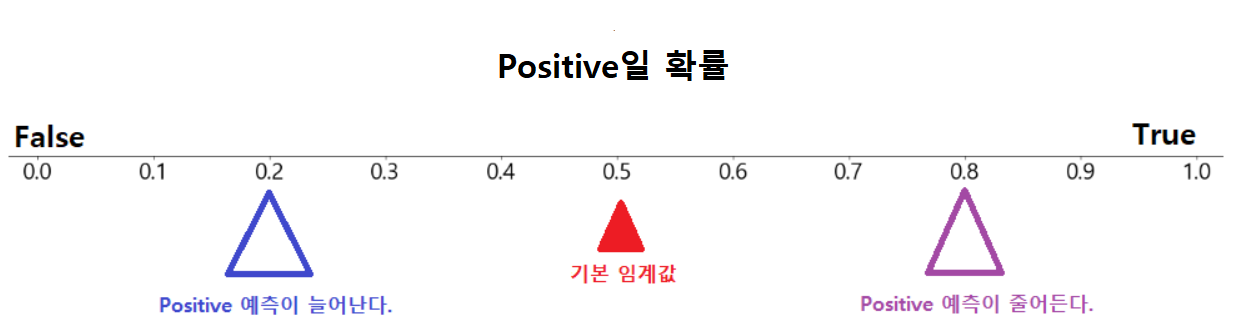

- Positive일 확률이 임계값 이상이면 Positive, 미만이면 Negative로 예측한다.

### 임계값 변경에 따른  정밀도와 재현율 변화관계
- 임계값을 높이면 양성으로 예측하는 기준을 높여서(엄격히 해서) 음성으로 예측되는 샘플이 많아 진다. 그래서 정밀도는 높아지고 재현율은 낮아진다.
- 임계값을 낮추면 양성으로 예측하는 기준이 낮아져서 양성으로 예측되는 샘플이 많아 진다. 그래서 재현율은 높아지고 정밀도는 낮아진다.
- 정리
    - **임계값을 낮추면 재현율은 올라가고 정밀도는 낮아진다.**
    - **임계값을 높이면 재현율은 낮아지고 정밀도는 올라간다.**
- 임계값을 변화시켰을때 **재현율과 정밀도는 반비례 관계를 가진다.**
- 임계값을 변화시켰을때 **재현율과 위양성율(Fall-Out/FPR)은 비례 관계를 가진다.**

### 임계값 변화에 따른 recall, precision 변화

##### 분류 모델의 추론 메소드
- model.predict(X)
    - 추론한 X의 class를 반환
- model.predict_proba(X)
    - 추론한 X의 class별 확률을 반환

In [76]:
print(X_test.shape)
r = tree.predict_proba(X_test)
print(r.shape)
r[:5]

(450, 64)
(450, 2)


array([[0.99173554, 0.00826446],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348],
       [0.98695652, 0.01304348]])

In [77]:
tree.predict(X_test)[:5]



array([0, 0, 0, 0, 0])

##### 임계값 변화에 따른 recall/precision 확인
- **precision_recall_curve(y_정답, positive_예측확률)** 이용
    - 반환값: Tuple - (precision리스트, recall리스트, threshold리스트) 
        - threshold(임계값) 0에서 1까지 변경하며 변화되는 precsion과 recall값을 반환

In [79]:
from sklearn.metrics import precision_recall_curve
pos_proba = tree.predict_proba(X_test)[:, 1]  #1(positive)의 확률만 추출 (450, 2)
precisions, recalls, thresholds = precision_recall_curve(y_test, pos_proba)
# threshold 마지막에 1이 생략됨. precision과 recall은 threshold 1일때 결과를 가지고 있다.
print(precisions.shape, recalls.shape, thresholds.shape)

(8,) (8,) (7,)


In [80]:
thresholds = np.append(thresholds,1) # threshold 1을 추가
print(precisions.shape, recalls.shape, thresholds.shape)

(8,) (8,) (8,)


In [81]:
import pandas as pd
pd.DataFrame({
    'threshold':thresholds,
    'precision':precisions,
    'recall':recalls
})

threshold  precision    recall
0   0.008264   0.100000  1.000000
1   0.013043   0.107579  0.977778
2   0.033898   0.431818  0.844444
3   0.040000   0.513889  0.822222
4   0.149254   0.560606  0.822222
5   0.545455   0.755556  0.755556
6   0.750000   0.823529  0.622222
7   1.000000   1.000000  0.000000

###### plotting

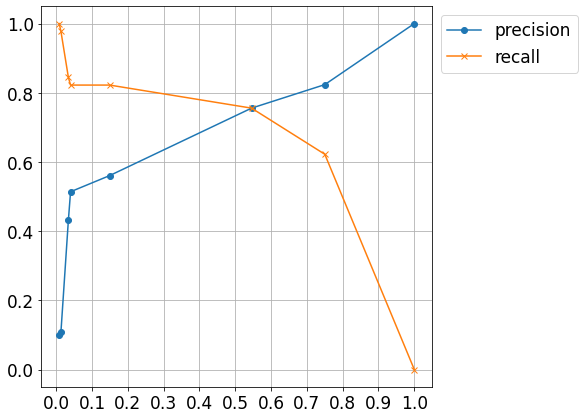

In [85]:
plt.figure(figsize=(7,7))
# X; threshold
plt.plot(thresholds, precisions, marker='o', label='precision') #y: precision 
plt.plot(thresholds, recalls, marker='x', label='recall') # y: recall 

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(1,1))
plt.show()

### Binarizer - 임계값 변경
- Transformer로 설정한 임계점 보다 작으거나 같으면 0, 크면 1로 변환하는 변환기
- Binarizer를 이용해 원하는 임계값을 설정하여 양성/음성 분류기준을 변경할 수 있다.

##### Binarizer 간단 예제

In [87]:
from sklearn.preprocessing import Binarizer

In [90]:
exam = [[0.3, 0.7,0.4, 0.6, 0.5]]

# binarizer = Binarizer(threshold=0.1) #0.1 이하: 0, 초과: 1  로 변환.
# binarizer = Binarizer(threshold=0.5) #0.5 이하: 0, 초과: 1  로 변환.
binarizer = Binarizer(threshold=0.6) #0.1 이하: 0, 초과: 1  로 변환.
binarizer.fit_transform(exam) 

array([[0., 1., 0., 0., 0.]])

In [92]:
exam = np.array(exam)
th = 0.1
np.where(exam <= th, 0, 1)

array([[1, 1, 1, 1, 1]])

##### 모델 예측 결과에 적용

In [95]:
binarizer1 = Binarizer(threshold=0.1) 
binarizer2 = Binarizer(threshold=0.4) 

pred_proba = tree.predict_proba(X_test)

pred_test_tree2 = binarizer1.fit_transform(pred_proba)[:, 1] 
pred_test_tree3 = binarizer2.fit_transform(pred_proba)[:, 1]

In [96]:
print('결정트리 - 임계값(0.1)')
print(recall_score(y_test, pred_test_tree2), precision_score(y_test, pred_test_tree2))
print('결정트리 - 임계값(0.4)')
print(recall_score(y_test, pred_test_tree3), precision_score(y_test, pred_test_tree3))

결정트리 - 임계값(0.1)
0.8222222222222222 0.5606060606060606
결정트리 - 임계값(0.4)
0.7555555555555555 0.7555555555555555


In [97]:
print_metrics_classifier(y_test, pred_test_tree2, 'TH 0.1')

TH 0.1
정확도(Accuracy):  0.9177777777777778
재현률(Recall): 0.8222222222222222
정밀도(Precision): 0.5606060606060606
F1점수: 0.6666666666666666


In [98]:
print_metrics_classifier(y_test, pred_test_tree3, 'TH 0.4')

TH 0.4
정확도(Accuracy):  0.9511111111111111
재현률(Recall): 0.7555555555555555
정밀도(Precision): 0.7555555555555555
F1점수: 0.7555555555555555


## PR Curve(Precision Recall Curve-정밀도 재현율 곡선)와 AP Score(Average Precision Score)
- Positive 확률 0~1사이의 모든 임계값에 대하여 재현율(recall)과 정밀도(precision)의 변화를 이용한 평가 지표
- X축에 재현율, Y축에 정밀도를 놓고 임계값이 1 → 0 변화할때 두 값의 변화를 선그래프로 그린다.
- AP Score
    - PR Curve의 성능평가 지표를 하나의 점수(숫자)로 평가한것.
    - PR Curve의 선아래 면적을 계산한 값으로 높을 수록 성능이 우수하다.
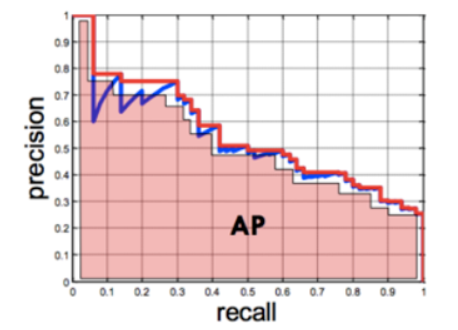   

In [115]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_score, average_precision_score

# decision tree/randomforest 모델을 이용해 positive 확률
tree_pos = tree.predict_proba(X_test)[:, 1]
rfc_pos= rf.predict_proba(X_test)[:, 1]

precision1, recall1, threshold1 = precision_recall_curve(y_test, tree_pos) #(정답, pos 확률)
precision2, recall2, threshold2 = precision_recall_curve(y_test, rfc_pos)



print(precision1.shape, recall1.shape, threshold1.shape)

(8,) (8,) (7,)


In [101]:
print(recall1)
print(precision1)
print(threshold1)

[1.         0.97777778 0.84444444 0.82222222 0.82222222 0.75555556
 0.62222222 0.        ]
[0.1        0.10757946 0.43181818 0.51388889 0.56060606 0.75555556
 0.82352941 1.        ]
[0.00826446 0.01304348 0.03389831 0.04       0.14925373 0.54545455
 0.75      ]


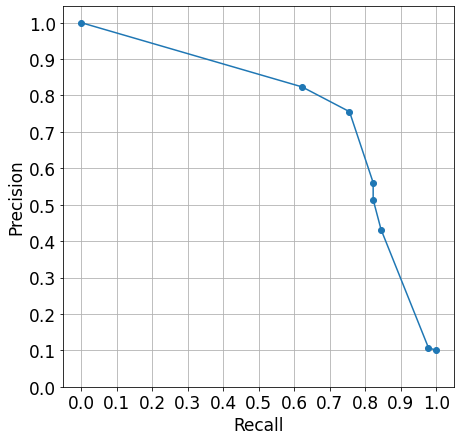

In [102]:
plt.figure(figsize=(7,7))
# threshold1
plt.plot(recall1, precision1, marker='o')  #x: recall변화, y: precision변화

plt.xticks(np.arange(0, 1.1, 0.1)) 
plt.yticks(np.arange(0, 1.1, 0.1)) 
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid(True)
plt.show()

In [103]:
#.precision recall curve를 점수(정량)화.
average_precision_score(y_test, tree_pos) #(정답, pos 확률)

0.6766948888666132

In [106]:
average_precision_score(y_test, rfc_pos)

0.8761708259214304

In [104]:
from sklearn.metrics import plot_precision_recall_curve

C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


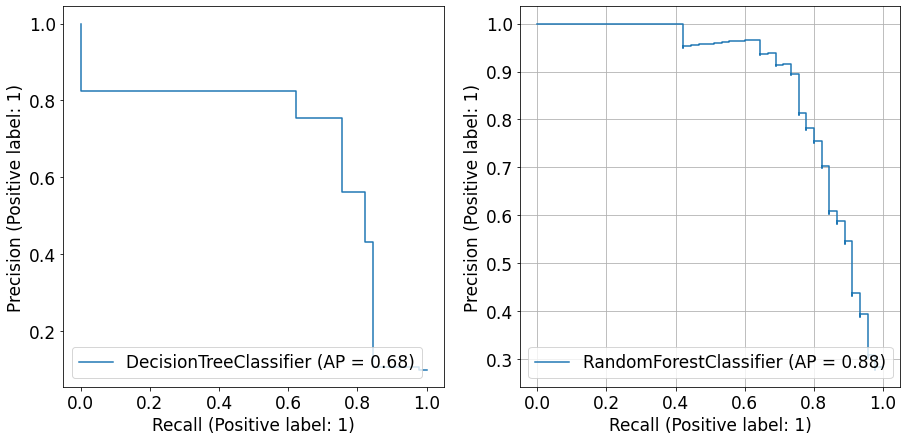

In [109]:
fig, ax = plt.subplots(1,2, figsize=(15,7))
plot_precision_recall_curve(tree, X_test, y_test, ax=ax[0]) 
plot_precision_recall_curve(rf, X_test, y_test, ax=ax[1])
plt.grid(True)
plt.show()

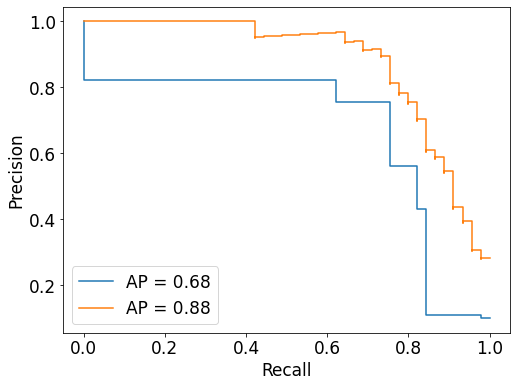

In [117]:
from sklearn.metrics import PrecisionRecallDisplay
plt.figure(figsize=(8,6))
ax = plt.gca()

ap_tree = average_precision_score(y_test, tree_pos)
disp = PrecisionRecallDisplay(precision1, recall1, average_precision=ap_tree)
disp.plot(ax=ax)

# randomforest
ap_rf = average_precision_score(y_test, rfc_pos)
disp2 = PrecisionRecallDisplay(precision2, recall2, average_precision=ap_rf)
disp2.plot(ax=ax);


## ROC curve(Receiver Operating Characteristic Curve)와 AUC(Area Under the Curve) score

- **FPR(False Positive Rate-위양성율)**
    - 위양성율 (fall-out)
    - 1-특이도(TNR)
    - 실제 음성중 양성으로 잘못 예측 한 비율
    $$
    \cfrac{FP}{TN+FP}
    $$
- **TPR(True Positive Rate-재현율/민감도)** 
    - 재현율(recall)
    - 실제 양성중 양성으로 맞게 예측한 비율
    $$
    \frac{TP}{FN+TP}
    $$
- **ROC 곡선**
    - 2진 분류의 모델 성능 평가 지표 중 하나.
    - 불균형 데이터셋을 평가할 때 사용.
    - FPR을 X축, TPR을 Y축으로 놓고 임계값을 변경해서 FPR이 변할 때 TPR이 어떻게 변하는지 나타내는 곡선.
- **AUC**
    - ROC 곡선 아래쪽 면적
    - 0 ~ 1 사이 실수로 나오며 클수록 좋다.
   - **AUC 점수기준**
        - 1.0 ~ 0.9 : 아주 좋음
        - 0.9 ~ 0.8 : 좋음
        - 0.8 ~ 0.7 : 괜찮은 모델
        - 0.7 ~ 0.6 : 의미는 있으나 좋은 모델은 아님
        - 0.6 ~ 0.5 : 좋지 않은 모델

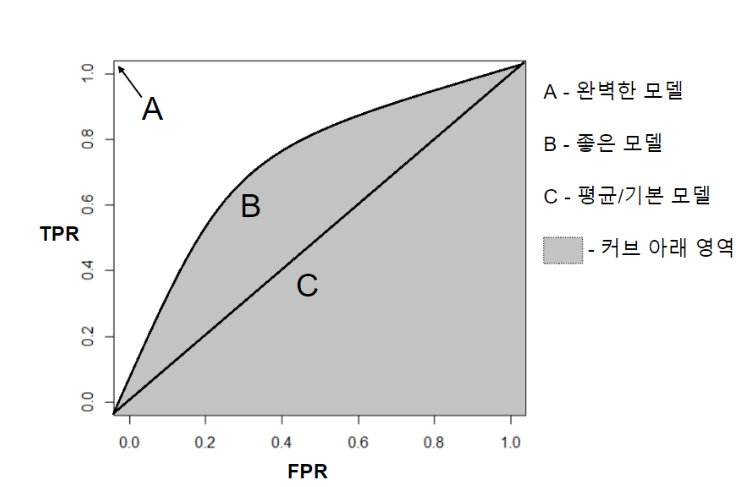

가장 완벽한 것은 FPR이 0이고 TPR이 1인 것이다. 
일반 적으로 FPR이 작을 때 (0에 가까울때) TPR이 높은 경우가 좋은 상황이다. 그래서 선 아래의 면적이 넓은 곡선이 나올 수록 좋은 모델이다.

### ROC, AUC 점수  확인
- roc_curve(y값, 예측확률) : FPR, TPR, Thresholds (임계치)
- roc_auc_score(y값, 예측확률) : AUC 점수 반환

## ROC Curve - Precision_Recall Curve
- ROC Curve
    - 이진분류에서 양성클래스 탐지와 음성클래스 탐지의 중요도가 비슷할 때 사용(개고양이 분류)
- Precision Recall curve
    - 양성클래스 탐지가 음성클래스 탐지의 중요도보다 높을 경우 사용(암환자 진단)

In [118]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

tree_pos = tree.predict_proba(X_test)[:, 1]
rfc_pos= rf.predict_proba(X_test)[:, 1]

fprs_tree, tprs_tree, thresholds_tree = roc_curve(y_test, tree_pos)
fprs_rfc, tprs_rfc, thresholds_rfc = roc_curve(y_test, rfc_pos)

print(fprs_tree.shape, tprs_tree.shape, thresholds_tree.shape)
print(fprs_rfc.shape, tprs_rfc.shape, thresholds_rfc.shape)

(8,) (8,) (8,)
(34,) (34,) (34,)


In [119]:
pd.DataFrame({
    "Threshold":thresholds_tree,
    "FPR": fprs_tree,
    "TPR": tprs_tree
})

Threshold       FPR       TPR
0   1.750000  0.000000  0.000000
1   0.750000  0.014815  0.622222
2   0.545455  0.027160  0.755556
3   0.149254  0.071605  0.822222
4   0.040000  0.086420  0.822222
5   0.033898  0.123457  0.844444
6   0.013043  0.901235  0.977778
7   0.008264  1.000000  1.000000

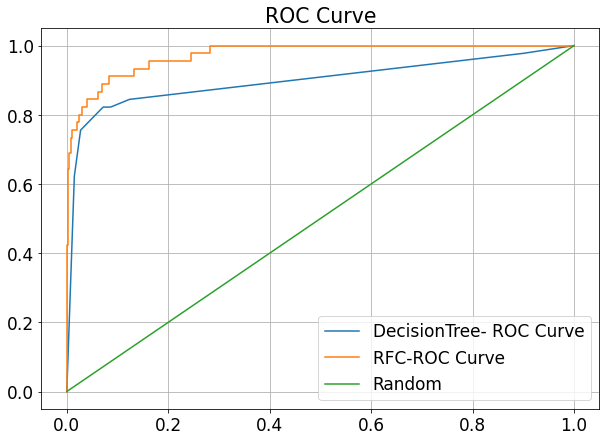

In [120]:
plt.figure(figsize=(10,7))
plt.plot(fprs_tree, tprs_tree, label='DecisionTree- ROC Curve')
plt.plot(fprs_rfc, tprs_rfc, label='RFC-ROC Curve')
plt.plot([0,1], [0,1], label='Random')

plt.legend(loc='lower right')
plt.grid(True)
plt.title('ROC Curve')
plt.show()


In [122]:
# roc auc score
from sklearn.metrics import roc_auc_score
print("DecisionTree roc auc점수:", roc_auc_score(y_test, tree_pos))
print("RandomForest roc auc점수:", roc_auc_score(y_test, rfc_pos))

DecisionTree roc auc점수: 0.8975308641975308
RandomForest roc auc점수: 0.9731138545953362


C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Playdata\anaconda3\envs\ml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function `plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: RocCurveDisplay.from_predictions or RocCurveDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


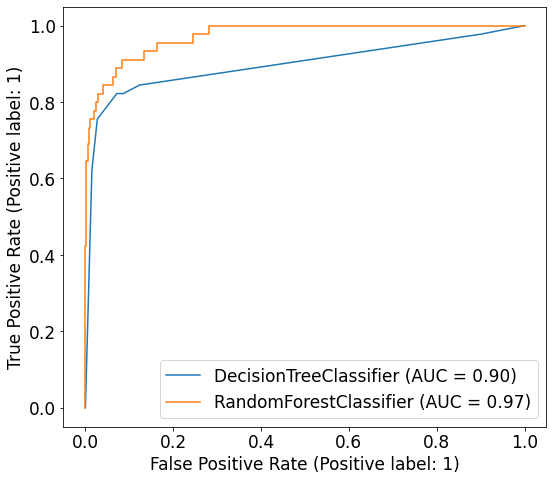

In [124]:
# plot_roc_curve
from sklearn.metrics import plot_roc_curve
fig, ax = plt.subplots(1,1, figsize=(8,7))
plot_roc_curve(tree, X_test, y_test, ax=ax)
plot_roc_curve(rf, X_test, y_test, ax=ax)

plt.tight_layout()
plt.show()

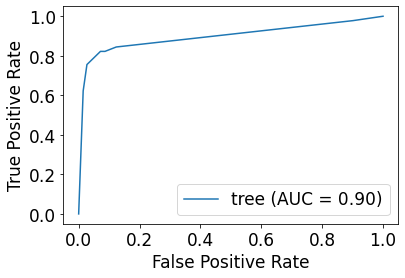

In [129]:
from sklearn.metrics import RocCurveDisplay
auc = roc_auc_score(y_test, tree_pos)
disp = RocCurveDisplay(fpr=fprs_tree, tpr=tprs_tree, roc_auc=auc, estimator_name='tree')
disp.plot();

# TODO
- breast_cancer data 모델링
1. breast cancer data 로딩 및 
1. train/test set으로 분리
1. 모델링 (DecisionTreeClassifier(max_depth=3), RandomForestClassifier(max_depth=2, n_estimators=200)
1. 평가 (Train/Test set)
    - 평가지표
        - accuracy, recall, precision, f1 score, confusion matrix
        - PR curve 그리고 AP 점수 확인
        - ROC curve 그리고 AUC 점수확인

In [4]:
# import
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (accuracy_score, recall_score, precision_score, f1_score, 
                            confusion_matrix, ConfusionMatrixDisplay,
                            precision_recall_curve, PrecisionRecallDisplay, 
                            roc_curve, RocCurveDisplay, 
                            average_precision_score, roc_auc_score)

In [5]:
# data load, 나누기
X, y = load_breast_cancer(return_X_y=True)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y,
                                                    random_state=0)
X_train.shape, X_test.shape

((455, 30), (114, 30))

In [8]:
# y class 분포
np.unique(y, return_counts=True)
np.unique(y, return_counts=True)[1]/y.size

array([0.37258348, 0.62741652])

In [9]:
# 모델 생성, 학습
tree = DecisionTreeClassifier(max_depth=3, random_state=0)
rf = RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

tree.fit(X_train, y_train)
rf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, n_estimators=200, random_state=0)

In [18]:
# 추론 
# tree
pred_train_tree = tree.predict(X_train) #최종 class를 예측
pred_test_tree = tree.predict(X_test)
pred_train_prob_tree = tree.predict_proba(X_train)[:, 1]   #확률 예측 (positive)
pred_test_prob_tree = tree.predict_proba(X_test)[:, 1]


# rf
pred_train_rf = rf.predict(X_train)
pred_test_rf = rf.predict(X_test)
pred_train_prob_rf = rf.predict_proba(X_train)[:, 1]
pred_test_prob_rf = rf.predict_proba(X_test)[:, 1]


In [14]:
def print_metrics(y, pred, pred_prob, title):
    """
     분류 평가 출력 함수
     [parameter]
         y:ndarray - 정답
         pred:ndarray - 예측 class
         pred_prob:ndarray - 예측 양성 확률
         title:str - 제목
    """
    print(title)
    print("정확도(accuracy):", accuracy_score(y, pred))
    print('재현율(recall):', recall_score(y, pred))
    print("정밀도(precision):", precision_score(y, pred))
    print('F1 점수:', f1_score(y, pred))
    
    print('AP 점수:', average_precision_score(y, pred_prob))
    print('AUC 점수:', roc_auc_score(y, pred_prob))

In [15]:
# Tree - Train
print_metrics(y_train, pred_train_tree, pred_train_prob_tree, "DecisionTree Train set")

DecisionTree Train set
정확도(accuracy): 0.9736263736263736
재현율(recall): 0.9964912280701754
정밀도(precision): 0.9627118644067797
F1 점수: 0.9793103448275863
AP 점수: 0.9842102478389377
AUC 점수: 0.9863261093911249


In [16]:
# Tree - test
print_metrics(y_test, pred_test_tree, pred_test_prob_tree, "DecisionTree Test set")

DecisionTree Test set
정확도(accuracy): 0.9210526315789473
재현율(recall): 0.9305555555555556
정밀도(precision): 0.9436619718309859
F1 점수: 0.9370629370629372
AP 점수: 0.9508563971094506
AUC 점수: 0.9446097883597883


In [19]:
# RandomForest Train
print_metrics(y_train, pred_train_rf, pred_train_prob_rf, "RandomForest Train set")

RandomForest Train set
정확도(accuracy): 0.9692307692307692
재현율(recall): 0.9859649122807017
정밀도(precision): 0.9656357388316151
F1 점수: 0.9756944444444443
AP 점수: 0.9973840556546545
AUC 점수: 0.9957481940144479


In [20]:
# RandomForest Test
print_metrics(y_test, pred_test_rf, pred_test_prob_rf, "RandomForest Test set")

RandomForest Test set
정확도(accuracy): 0.9385964912280702
재현율(recall): 0.9444444444444444
정밀도(precision): 0.9577464788732394
F1 점수: 0.951048951048951
AP 점수: 0.977122126791544
AUC 점수: 0.9718915343915344


In [21]:
# Confusion Matrix
confusion_matrix(y_train, pred_train_tree)

array([[159,  11],
       [  1, 284]], dtype=int64)

In [22]:
def display_confusion_matrix(y, pred, title):
    """confusion matrix 시각화"""
    cm = confusion_matrix(y, pred)
    disp = ConfusionMatrixDisplay(cm)
    disp.plot(cmap='Blues')

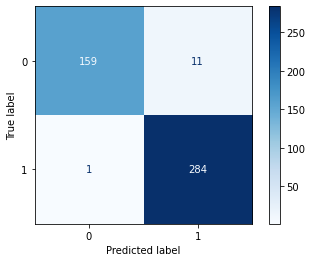

In [24]:
# Tree, Trainset
display_confusion_matrix(y_train, pred_train_tree, "DecsionTree-Trainset")

In [27]:
import matplotlib.pyplot as plt
# Precision Recall curve
def display_pr_curve(y, pred_prob, title):
    """precision recall curve 시각화"""
    precision, recall, _ = precision_recall_curve(y, pred_prob)
    ap_score = average_precision_score(y, pred_prob)
    disp = PrecisionRecallDisplay(precision, recall, average_precision=ap_score)
    disp.plot()
    plt.title(title)
    plt.grid(True)

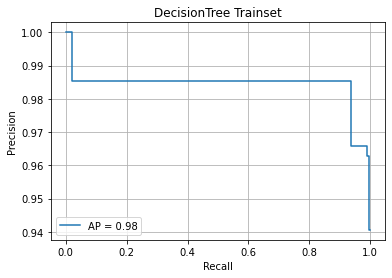

In [28]:
display_pr_curve(y_train, pred_train_prob_tree, "DecisionTree Trainset")

In [29]:
def display_roc_curve(y, pred_prob, title):
    fpr, tpr, _ = roc_curve(y, pred_prob)
    auc_score = roc_auc_score(y, pred_prob)
    disp = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=auc_score)
    disp.plot()
    plt.title(title)

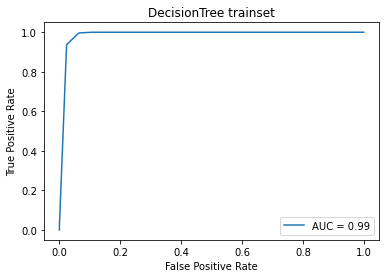

In [30]:
display_roc_curve(y_train, pred_train_prob_tree, "DecisionTree trainset")